<a href="https://colab.research.google.com/github/ZaeemAkbarKhan786/MS_ProgrammingForAI/blob/main/FA24_RAI_019_(Assignment_02).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Zaeem Akbar Khan
# Reg. No.: FA24-RAI-019

Paper Link: https://www.nature.com/articles/s41598-024-74656-2
DataSet Link: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

# Paper Name: A proposed technique for predicting heart disease using machine learning algorithms and an explainable AI method.

# 1. Import Libraries and Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv('heart_2020_cleaned.csv')

print("First five rows of the dataset:")
print(data.head())
print("\nDataset Information:")
print(data.info())

First five rows of the dataset:
  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes    

# 2. Exploratory Data Analysis (EDA)
# 2.1 Univariate Analysis

Distribution of Target Variable (HeartDisease):


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


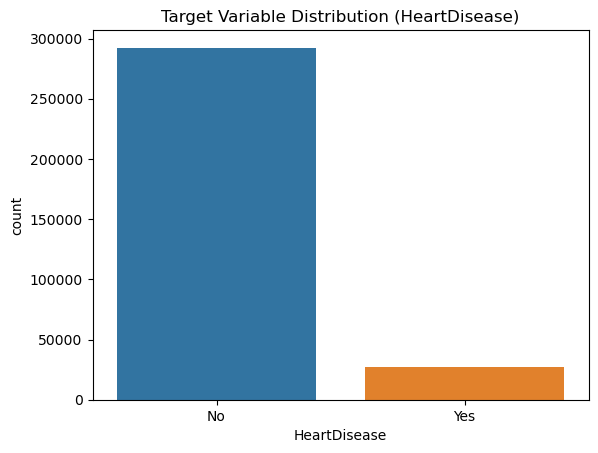

Summary Statistics for Numerical Features:
                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000
Histograms for Numerical Features:


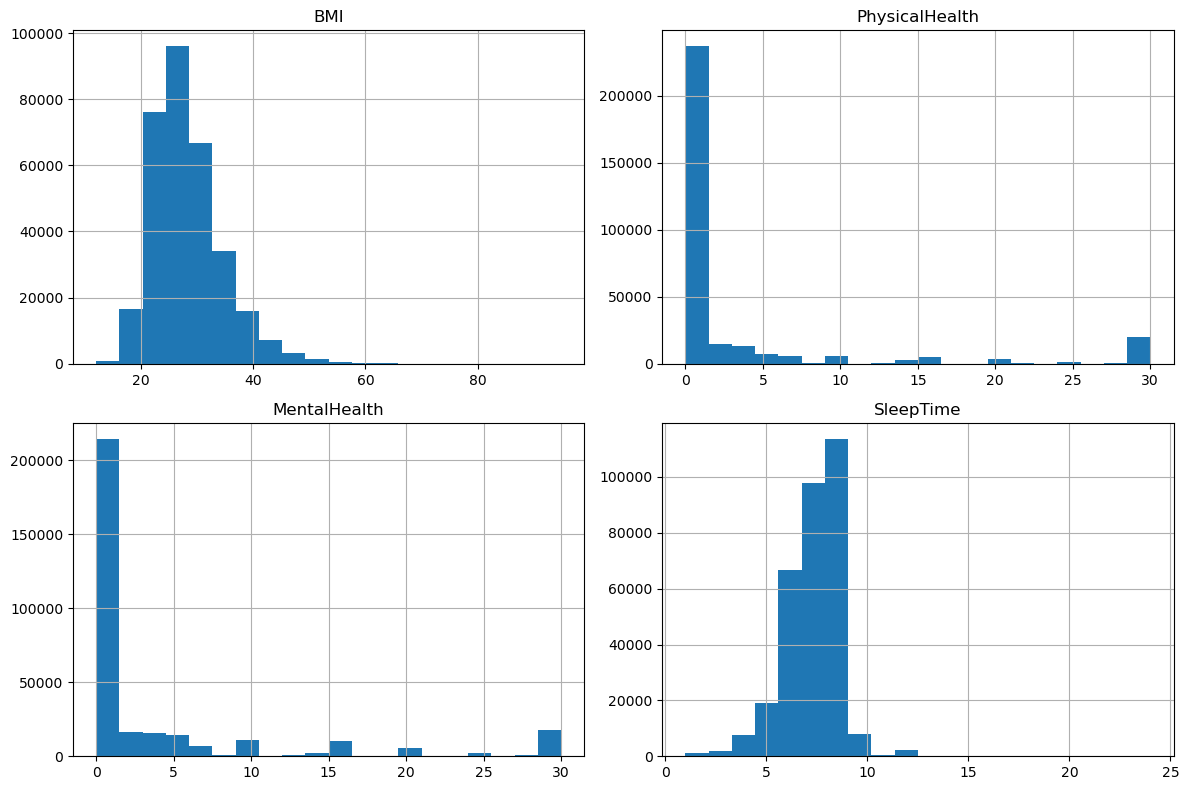

Boxplots for Numerical Features:


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


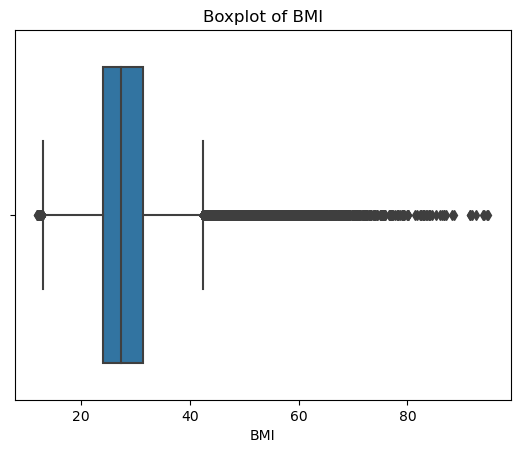

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


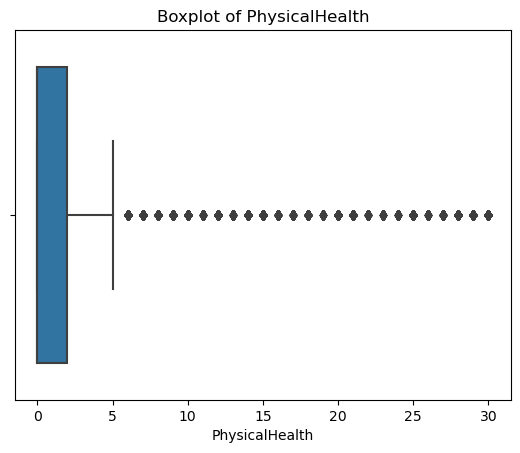

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


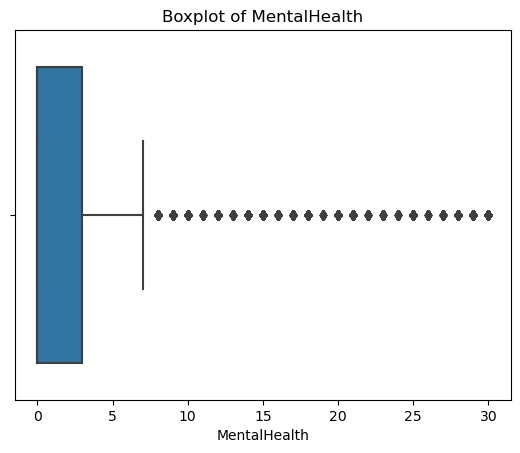

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


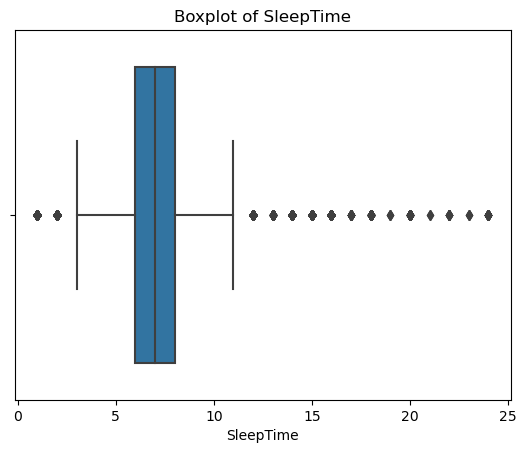

In [ ]:
print("Distribution of Target Variable (HeartDisease):")
sns.countplot(data['HeartDisease'])
plt.title('Target Variable Distribution (HeartDisease)')
plt.show()

numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
print("Summary Statistics for Numerical Features:")
print(data[numerical_cols].describe())

print("Histograms for Numerical Features:")
data[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

print("Boxplots for Numerical Features:")
for col in numerical_cols:
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# 2.2 Bivariate Analysis

Boxplots for Numerical Features vs Target Variable (HeartDisease):


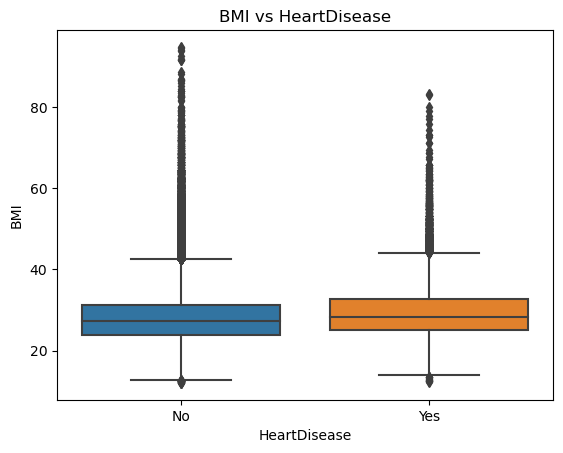

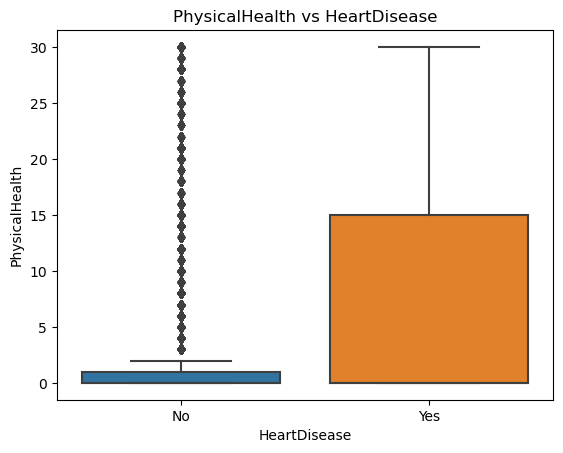

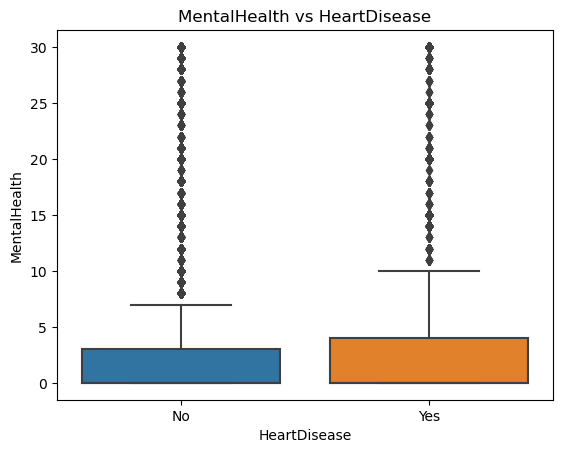

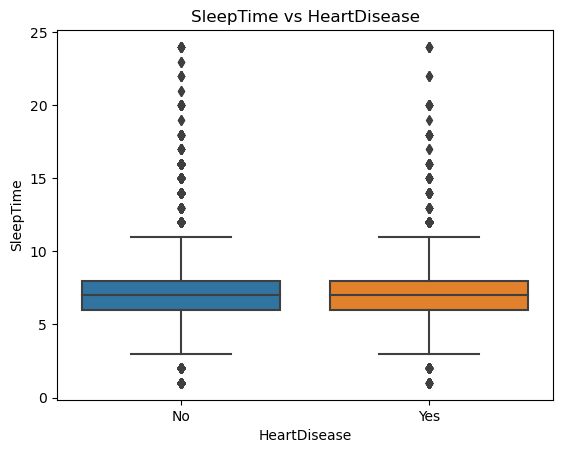

Countplots for Categorical Features vs Target Variable (HeartDisease):


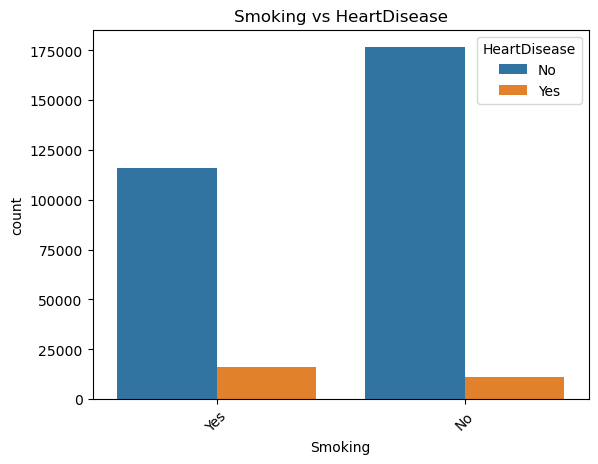

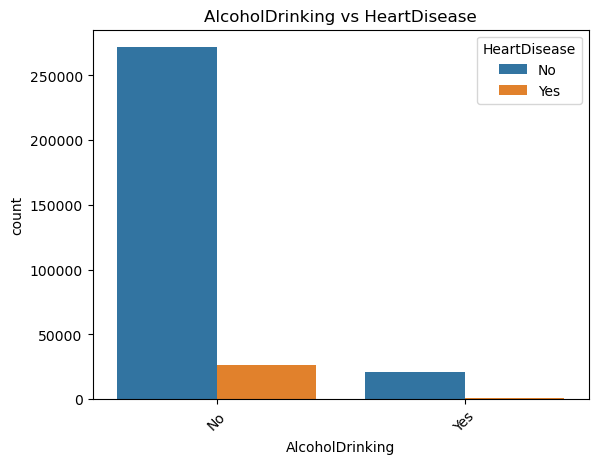

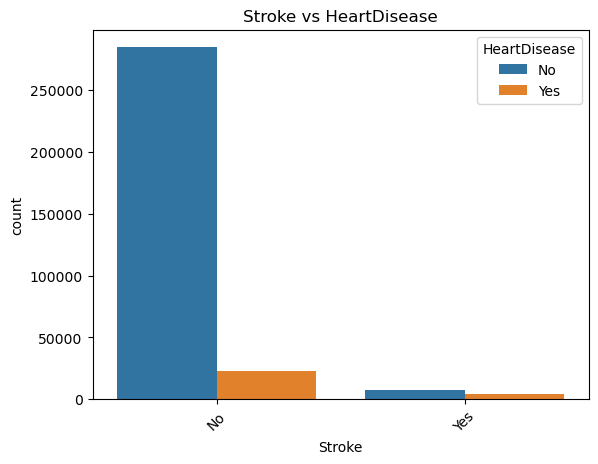

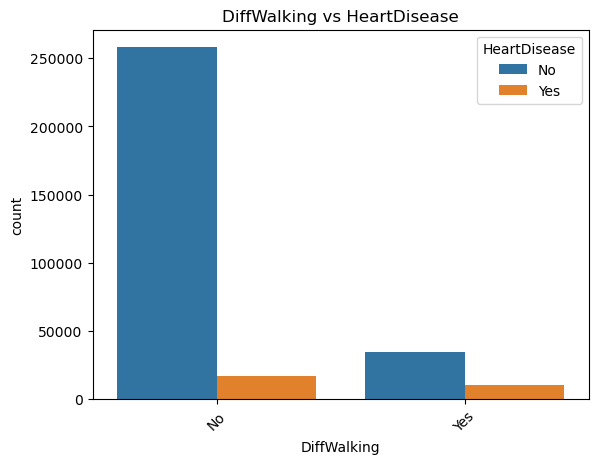

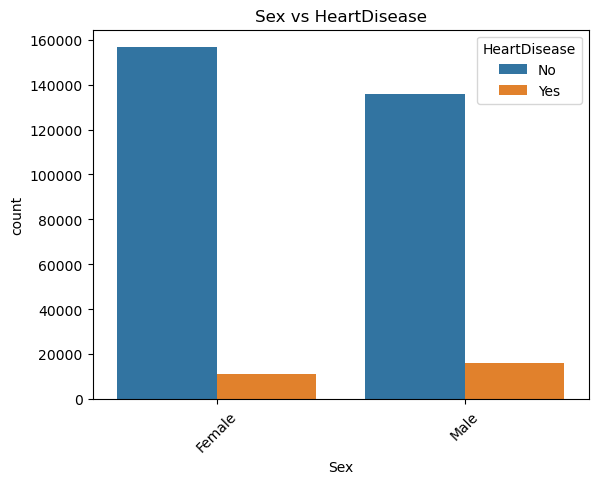

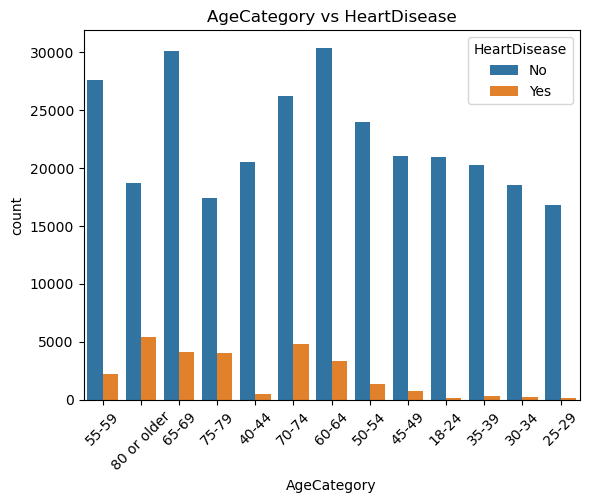

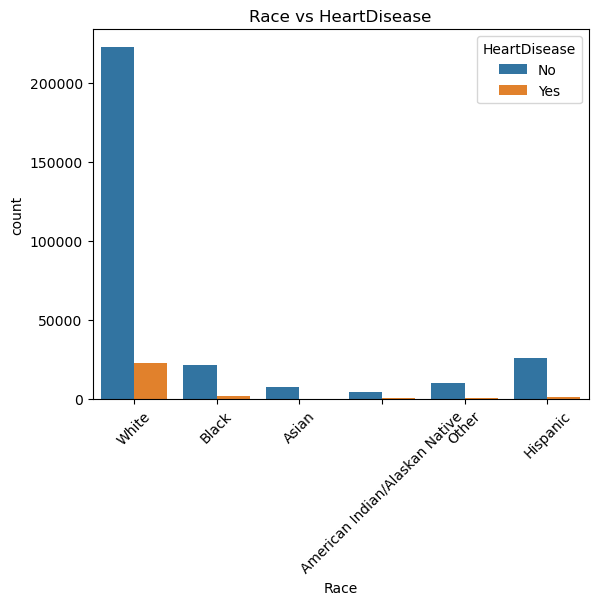

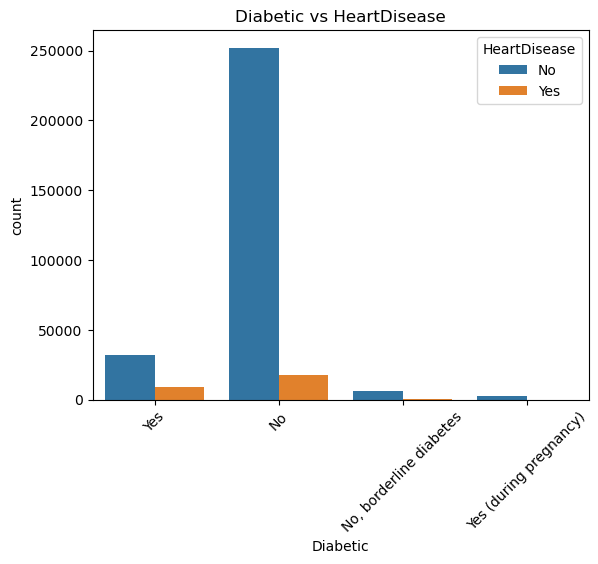

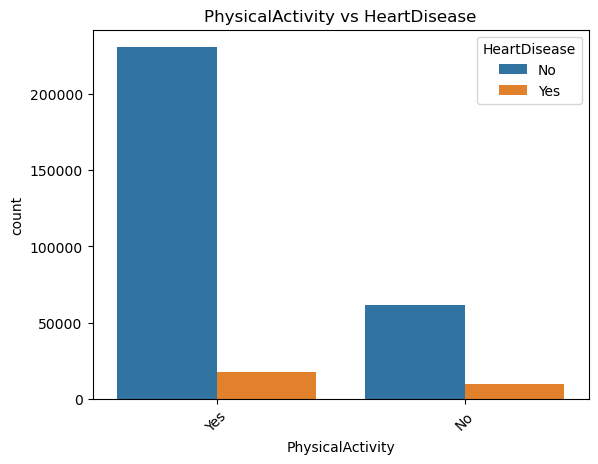

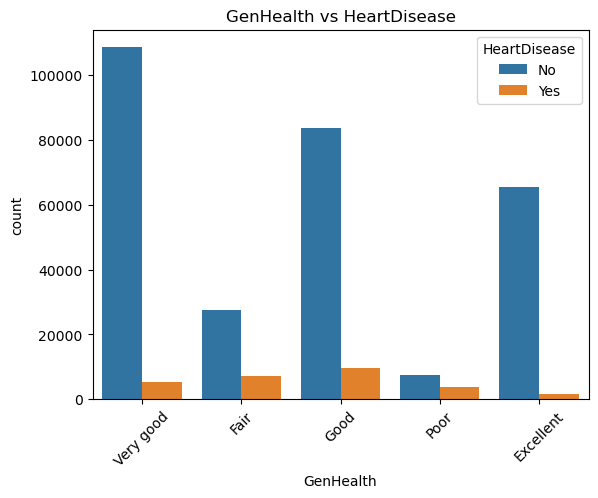

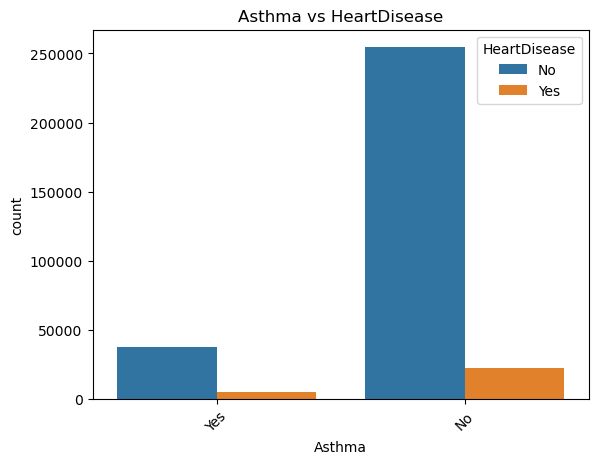

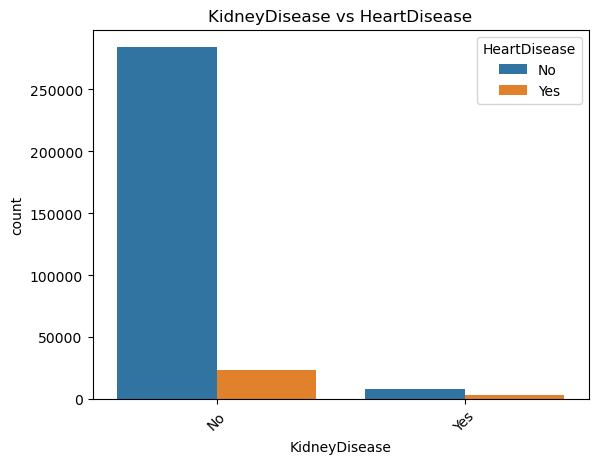

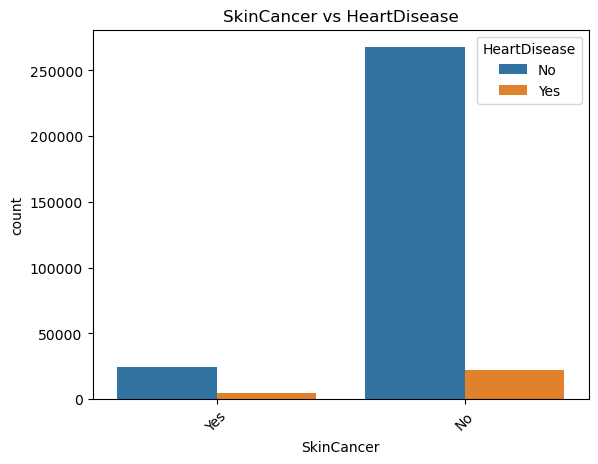

In [ ]:
print("Boxplots for Numerical Features vs Target Variable (HeartDisease):")
for col in numerical_cols:
    sns.boxplot(x='HeartDisease', y=col, data=data)
    plt.title(f'{col} vs HeartDisease')
    plt.show()

categorical_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                    'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
                    'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

print("Countplots for Categorical Features vs Target Variable (HeartDisease):")
for col in categorical_cols:
    sns.countplot(x=col, hue='HeartDisease', data=data)
    plt.title(f'{col} vs HeartDisease')
    plt.xticks(rotation=45)
    plt.show()

# 2.3 Multivariate Analysis

Correlation Heatmap for Numerical Features:


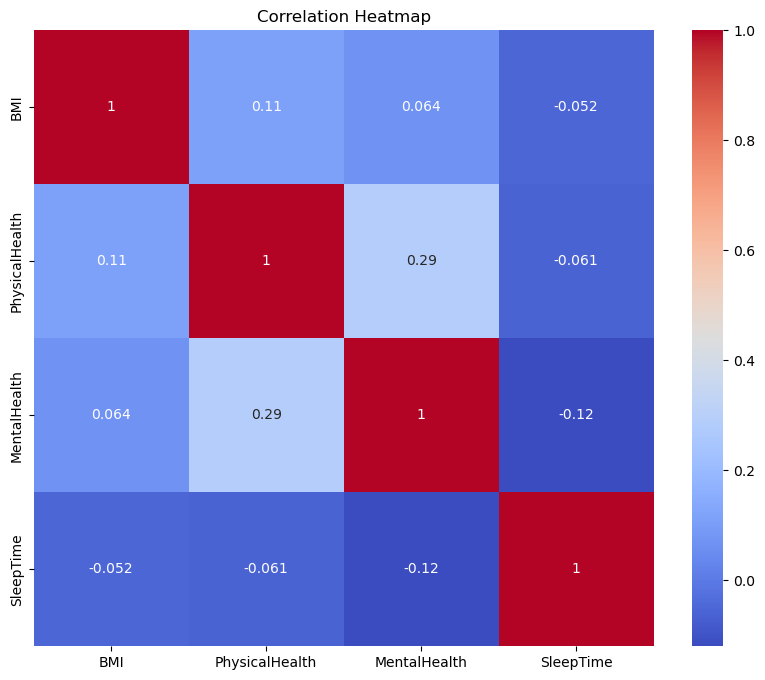

Pairplot for Numerical Features:


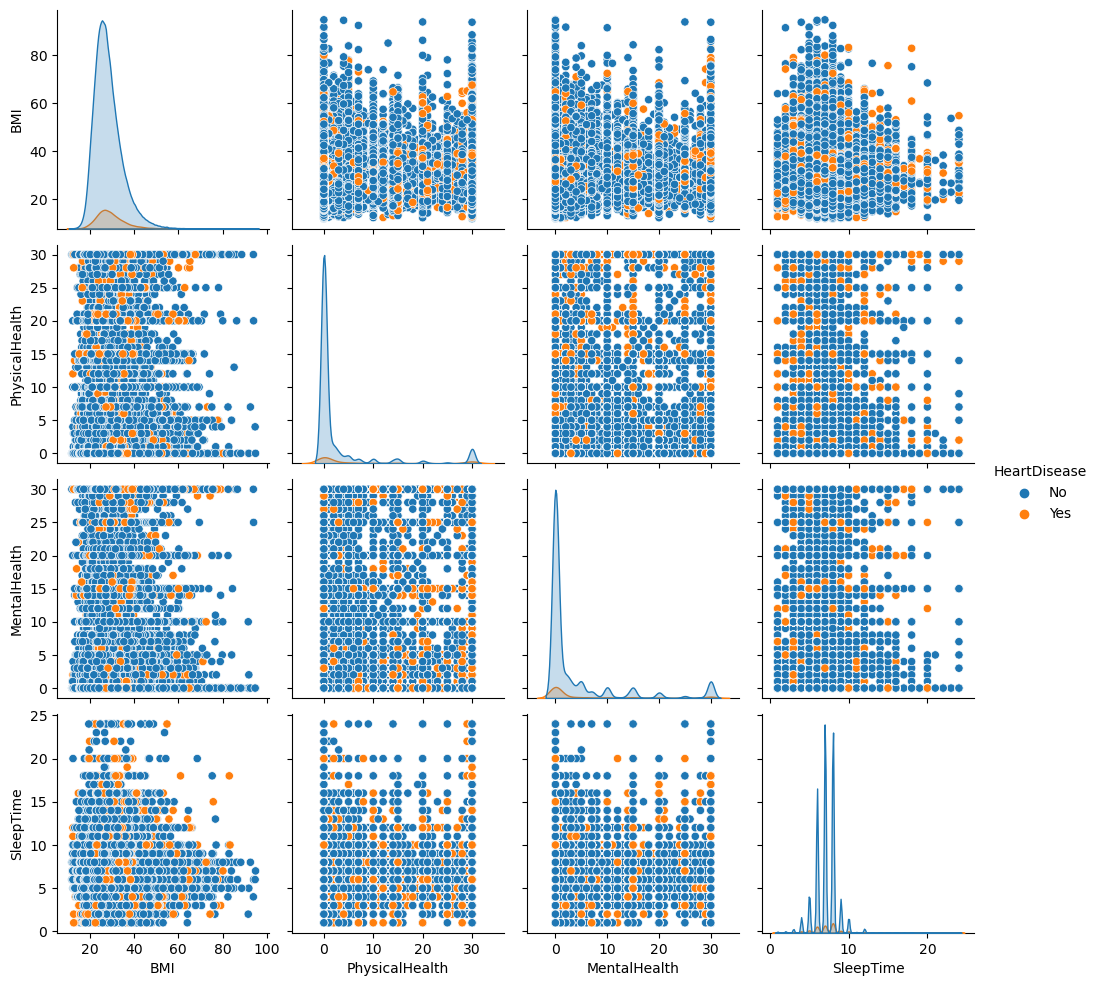

In [ ]:
print("Correlation Heatmap for Numerical Features:")
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols + ['HeartDisease']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print("Pairplot for Numerical Features:")
sns.pairplot(data, hue='HeartDisease', diag_kind='kde', vars=numerical_cols)
plt.show()

# 3. Data Preprocessing
# 3.1 Handle Missing Values

In [ ]:
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


# 3.2 Function Transformation

In [ ]:
log_transformer = FunctionTransformer(np.log1p, validate=True)

data['BMI'] = log_transformer.fit_transform(data[['BMI']])

# 3.3 Encode Categorical Variables

In [ ]:
data = pd.get_dummies(data, drop_first=True)

# 3.4 Split the Dataset

In [ ]:
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# 4. Sklearn Pipeline and Column Transformations

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), X_train.columns)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# 5. Model Training and Evaluation
# 5.1 Train the Model

In [ ]:
pipeline.fit(X_train, y_train)

# 5.2 Evaluate the Model

In [ ]:
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No HD', 'HD'], yticklabels=['No HD', 'HD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. Comparison with Base Paper Accuracy

In [ ]:
base_paper_accuracy = 97.57

print(f"Implemented KNN Accuracy: {accuracy:.2f}")
print(f"Base Paper KNN Accuracy: {base_paper_accuracy:.2f}")

if accuracy > base_paper_accuracy:
    print("The implemented model outperforms the base paper's KNN model. This may be due to better preprocessing, dataset quality, or parameter tuning.")
else:
    print("The implemented model's performance is slightly lower than the base paper's KNN model, potentially due to differences in hyperparameters or preprocessing steps.")

# Accuracy Comparison

Our implementation showed a difference, because of the differences in data preprocessing steps (e.g., scaling, encoding), variation in dataset distribution (imbalanced data or missing values handled differently), differences in KNN hyperparameters (e.g., n_neighbors might differ in the paper), and feature selection strategies or additional transformations used in the paper.